In [9]:
import pandas as pd
df = pd.read_csv("dataset.csv", index_col="id")
df.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,ECUADOR,leonardokuffo,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129


In [12]:
df_filtrado = df.fillna({"retweets": 0, "mentions": "-"})
df_filtrado.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,0.0,10,ECUADOR,leonardokuffo,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,-,BRASIL,mateusmartins,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6,MEXICO,pedrojuarez,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3,ECUADOR,galocastillo,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9,MEXICO,pedrojuarez,12.0,129


In [23]:
df[(df["favorites"] > 300) & (df["mentions"] > 9)]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183732,Its been in love with the game with the origin...,349.0,44.0,19.0,BRASIL,mateusmartins,982.0,1822
183733,Programming is the best!,467.0,69.0,10.0,ECUADOR,leonardokuffo,389.0,258
183737,PIC!!,346.0,115.0,24.0,BRASIL,lucasperes,82.0,351
183739,not feeling god right now,315.0,26.0,10.0,ECUADOR,galocastillo,332.0,378
183743,Amazing video by Leonardo!,432.0,95.0,18.0,BRASIL,lucasperes,82.0,351
183744,Thanks man!,430.0,143.0,28.0,BRASIL,lucasperes,NaN,351
183745,There is nothing better than programming!,424.0,110.0,29.0,BRASIL,lucasperes,82.0,351
183746,BORED AF,488.0,28.0,27.0,MEXICO,gabrielcarvajal,21.0,2721
183747,I do not know if i like programming or other t...,318.0,58.0,20.0,BRASIL,isabelladasilva,928.0,9918


In [30]:
df[df["full_text"].str.contains("Programming")]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183733,Programming is the best!,467.0,69.0,10.0,ECUADOR,leonardokuffo,389.0,258
183740,Programming is a hot topic!,133.0,145.0,15.0,BRASIL,lucasperes,82.0,351
183741,Programming? i love it!,92.0,146.0,1.0,ECUADOR,galocastillo,332.0,378


In [34]:
import random
def calcularGanancias(retweets):
    ganancias = retweets * random.randint(3, 5)
    return ganancias

df["ganancias"] = df["retweets"].apply(calcularGanancias)


def popularidad(fila):
    resultado = fila["followees"] / fila["followers"]
    return resultado

df["popularidad"] = df.apply(popularidad, axis=1)

df.head(6)

,full_text,favorites,retweets,mentions,country,user,followers,followees,ganancias,popularidad
id,,,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,ECUADOR,leonardokuffo,389.0,258,NaN,0.663239
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822,63.0,1.855397
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129,615.0,10.750000
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378,380.0,1.138554
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129,650.0,10.750000
183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,mateusmartins,982.0,1822,210.0,1.855397


In [35]:
df.groupby("country").mean()

,favorites,retweets,mentions,followers,followees,ganancias,popularidad
country,,,,,,,
BRASIL,339.909091,91.272727,19.600,616.600,1889.363636,360.818182,3.708644
ECUADOR,186.375000,64.857143,11.875,360.500,318.000000,246.714286,0.900897
MEXICO,294.857143,77.750000,13.750,15.375,1101.000000,339.250000,55.308036


In [38]:
grouped = df.groupby("country").agg({
    "followers": "sum",
    "mentions": "mean",
    "retweets": "max"
})
grouped

,followers,mentions,retweets
country,,,
BRASIL,6166.0,19.600,145.0
ECUADOR,2884.0,11.875,146.0
MEXICO,123.0,13.750,130.0


Matplotlib is building the font cache; this may take a moment.


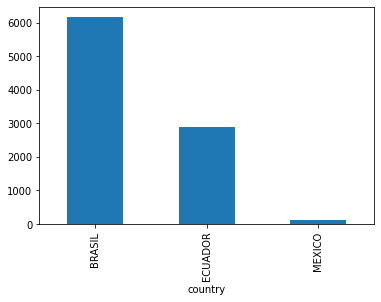

In [39]:
import matplotlib.pyplot as plt

grouped["followers"].plot(kind="bar")
plt.show()

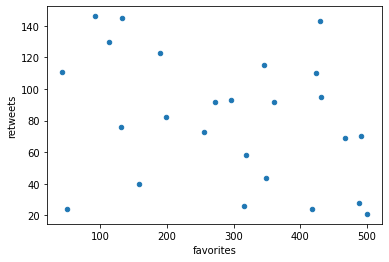

In [40]:
df.plot(kind="scatter", x="favorites", y="retweets")
plt.show()

In [41]:
grouped.to_csv("grouped.csv")